<a href="https://colab.research.google.com/github/Shruti-GiriK/Projects/blob/main/Indian_Population_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indian Population Analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVR,SVC
from sklearn.metrics import r2_score,classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB

---
# **About the Dataset**
---
This Dataset contains 50 rows and 8 columns containing information regarding the Indian Population. The data describes about the literacy rate, rural and urban population and unemployment rate by state and district.

---
# **Problem Statement**
---
It is important for person to have basic Literacy qualification to be able to make decisions in this complex world.

But there are still people who can't write their name or read even the most simplest sentences.Factors mainly financial issue cause many to not pursue their studies.
The government is taking steps, to increase the number of children to attend schools, like initiating aided schools, mid-day meal programs etc.

Using this dataset we will analyse the population and other features for each district so that, we can take steps to help parents to be able to educate their children.

---
# **Column Description**
---
1. **State**: Name of the State contains 10 unique states.
2. **District**: District Number
3. **Date**: Date of the cencus recorded
4. **Population**: Total population in that district.
5. **Urban_Population**: Total Urban Population in that district.
6. **Rural_Population**:Total Rural Population in that district.
7. **Literacy_Rate**: Percentage literate people in that district.
8. **Unemployment_Rate**: Percentage of unemployed people in that district.

# **1. Understanding the Data**

In [ ]:
df=pd.read_csv('/content/indian_population_data.csv')
df

,State,District,Date,Population,Urban_Population,Rural_Population,Literacy_Rate,Unemployment_Rate
0,Karnataka,District_1,2021-01-01,2958142,1149583.0,1808559,84.33,6.91
1,Maharashtra,District_3,2021-08-21,13351510,8538746.0,4812764,70.90,10.35
2,Tamil Nadu,District_5,2021-05-13,9030773,5093525.0,3937248,73.78,9.64
3,Maharashtra,District_3,2021-05-27,9573577,4882444.0,4691133,91.87,7.44
4,Tamil Nadu,District_1,2021-12-01,19201074,8580644.0,10620430,62.64,7.07
5,Gujarat,District_1,2021-06-09,9895417,6837305.0,3058112,85.90,6.30
6,Tamil Nadu,District_2,2021-10-31,1007141,564828.0,442313,86.76,NaN
7,Karnataka,District_4,2021-03-15,2179025,1455130.0,723895,80.32,2.92
8,Karnataka,District_3,2021-03-05,18456778,7604638.0,10852140,60.24,4.56
9,West Bengal,District_5,2021-02-26,2923304,1958101.0,965203,75.30,2.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              50 non-null     object 
 1   District           50 non-null     object 
 2   Date               50 non-null     object 
 3   Population         50 non-null     int64  
 4   Urban_Population   49 non-null     float64
 5   Rural_Population   50 non-null     int64  
 6   Literacy_Rate      49 non-null     float64
 7   Unemployment_Rate  46 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ KB


In [ ]:
df.shape

(50, 8)

In [ ]:
df['State'].unique()

array(['Karnataka', 'Maharashtra', 'Tamil Nadu', 'Gujarat', 'West Bengal',
       'Rajasthan', 'Madhya Pradesh', 'Uttar Pradesh', 'Andhra Pradesh',
       'Bihar'], dtype=object)

In [ ]:
df['District'].unique()

array(['District_1', 'District_3', 'District_5', 'District_2',
       'District_4'], dtype=object)

# **2. Data Cleaning**

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [State, District, Date, Population, Urban_Population, Rural_Population, Literacy_Rate, Unemployment_Rate]
Index: []


*No Duplicate Values*

In [ ]:
df.isnull().sum()

,0
State,0
District,0
Date,0
Population,0
Urban_Population,1
Rural_Population,0
Literacy_Rate,1
Unemployment_Rate,4


In [ ]:
df['Unemployment_Rate'].fillna(df['Unemployment_Rate'].median(),inplace=True)

<ipython-input-9-b00e7b426b10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Unemployment_Rate'].fillna(df['Unemployment_Rate'].median(),inplace=True)


<ipython-input-10-4b18b8529dce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Urban_Population'],hist=False)


<Axes: xlabel='Urban_Population', ylabel='Density'>

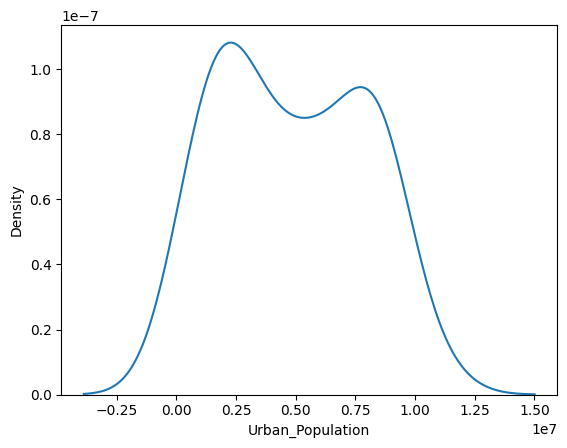

In [ ]:
sns.distplot(df['Urban_Population'],hist=False)

In [ ]:
df['Urban_Population'].fillna(df['Urban_Population'].mean(),inplace=True)

<ipython-input-11-c7c8441fd4e1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Urban_Population'].fillna(df['Urban_Population'].mean(),inplace=True)


<ipython-input-12-23fb39d272b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Literacy_Rate'],hist=False)


<Axes: xlabel='Literacy_Rate', ylabel='Density'>

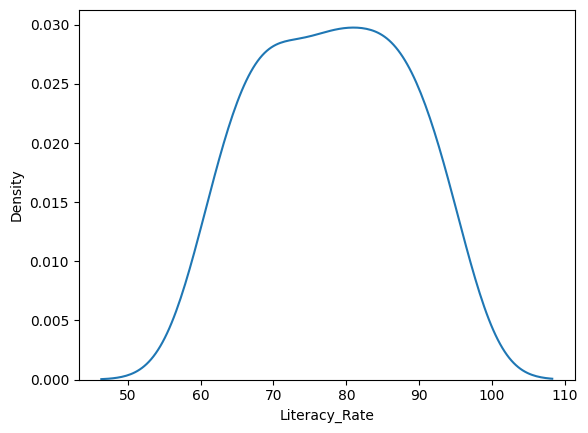

In [ ]:
sns.distplot(df['Literacy_Rate'],hist=False)

In [ ]:
df['Literacy_Rate'].fillna(df['Literacy_Rate'].median(),inplace=True)

<ipython-input-13-cfd8f7dc2602>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Literacy_Rate'].fillna(df['Literacy_Rate'].median(),inplace=True)


In [ ]:
df

,State,District,Date,Population,Urban_Population,Rural_Population,Literacy_Rate,Unemployment_Rate
0,Karnataka,District_1,2021-01-01,2958142,1.149583e+06,1808559,84.33,6.910
1,Maharashtra,District_3,2021-08-21,13351510,8.538746e+06,4812764,70.90,10.350
2,Tamil Nadu,District_5,2021-05-13,9030773,5.093525e+06,3937248,73.78,9.640
3,Maharashtra,District_3,2021-05-27,9573577,4.882444e+06,4691133,91.87,7.440
4,Tamil Nadu,District_1,2021-12-01,19201074,8.580644e+06,10620430,62.64,7.070
5,Gujarat,District_1,2021-06-09,9895417,6.837305e+06,3058112,85.90,6.300
6,Tamil Nadu,District_2,2021-10-31,1007141,5.648280e+05,442313,86.76,7.615
7,Karnataka,District_4,2021-03-15,2179025,1.455130e+06,723895,80.32,2.920
8,Karnataka,District_3,2021-03-05,18456778,7.604638e+06,10852140,60.24,4.560
9,West Bengal,District_5,2021-02-26,2923304,1.958101e+06,965203,75.30,2.610


In [ ]:
df.shape

(50, 8)

# **3. Descriptive Statistics**

In [ ]:
df.describe()

,Population,Urban_Population,Rural_Population,Literacy_Rate,Unemployment_Rate
count,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,50.000000
mean,9.800240e+06,4.861328e+06,4.928390e+06,77.92640,7.361400
std,5.951987e+06,2.981295e+06,3.360039e+06,9.95029,2.415118
min,6.977730e+05,2.690050e+05,4.287680e+05,60.24000,1.780000
25%,4.032124e+06,2.287364e+06,2.146844e+06,70.06000,5.835000
50%,9.477754e+06,4.835003e+06,4.419210e+06,78.66000,7.615000
75%,1.485667e+07,7.822593e+06,7.702816e+06,86.20000,9.197500
max,1.982286e+07,1.086285e+07,1.120322e+07,94.40000,11.390000


# **4. Data Visualization**

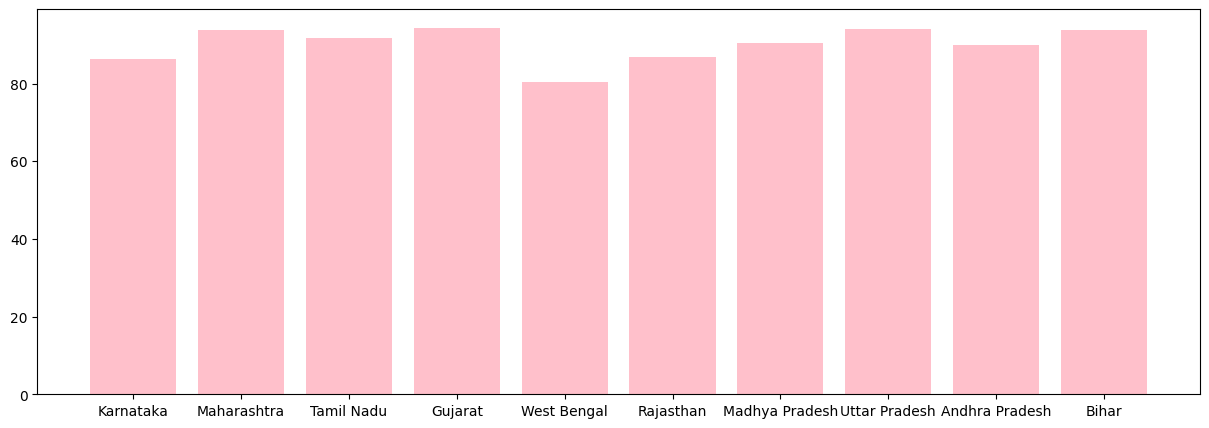

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(df['State'],df['Literacy_Rate'],color='pink')
plt.show()

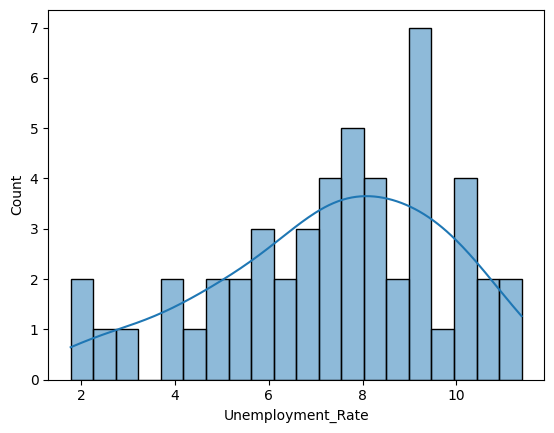

In [ ]:
sns.histplot(df['Unemployment_Rate'],bins=20,kde=True)
plt.show()

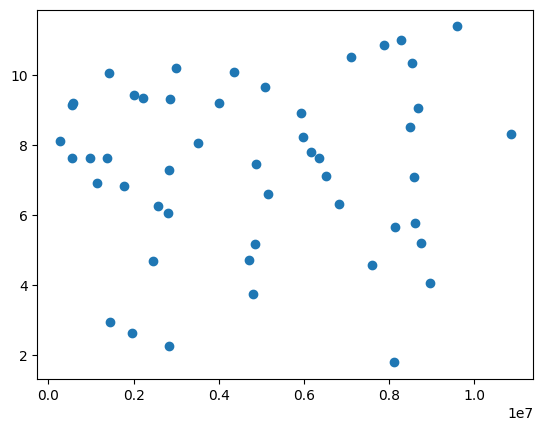

In [ ]:
plt.scatter(df['Urban_Population'],df['Unemployment_Rate'])

<Axes: xlabel='State', ylabel='Urban_Population'>

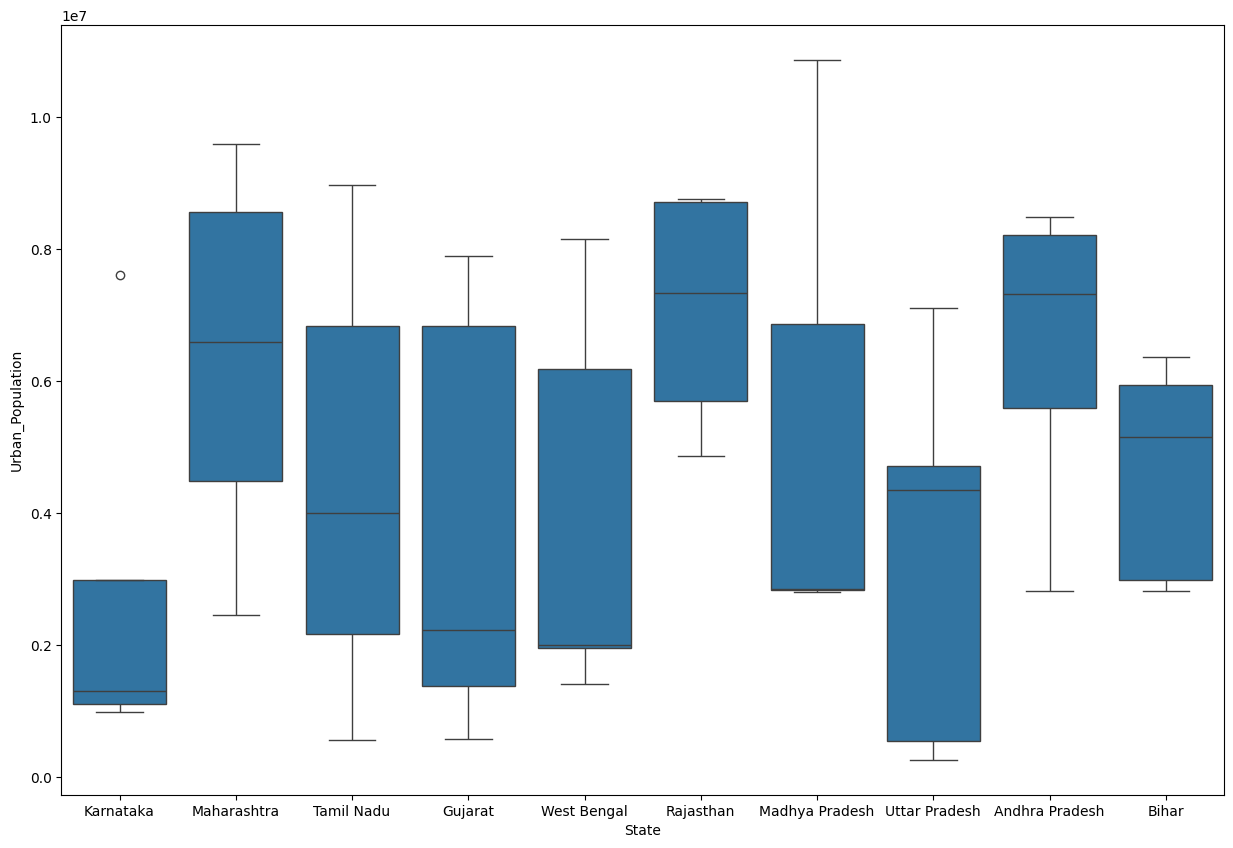

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State',y='Urban_Population',data=df)

# **5.Feature Engineering**


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Day of Week']=df['Date'].dt.dayofweek

df.drop('Date',axis=1,inplace=True)

# **6.Correlational Analysis**

In [ ]:
encoder=LabelEncoder()
df['State']=encoder.fit_transform(df['State'])

df['District'].replace(['District_1','District_2', 'District_3','District_4','District_5'],[1,2,3,4,5],inplace=True)

<ipython-input-22-02cafdce49cd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['District'].replace(['District_1','District_2', 'District_3','District_4','District_5'],[1,2,3,4,5],inplace=True)
<ipython-input-22-02cafdce49cd>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['District'].replac

In [ ]:
df.drop('Year',axis=1,inplace=True)

In [ ]:
df.head()

,State,District,Population,Urban_Population,Rural_Population,Literacy_Rate,Unemployment_Rate,Month,Day of Week
0,3,1,2958142,1149583.0,1808559,84.33,6.91,1,4
1,5,3,13351510,8538746.0,4812764,70.90,10.35,8,5
2,7,5,9030773,5093525.0,3937248,73.78,9.64,5,3
3,5,3,9573577,4882444.0,4691133,91.87,7.44,5,3
4,7,1,19201074,8580644.0,10620430,62.64,7.07,12,2


<Axes: >

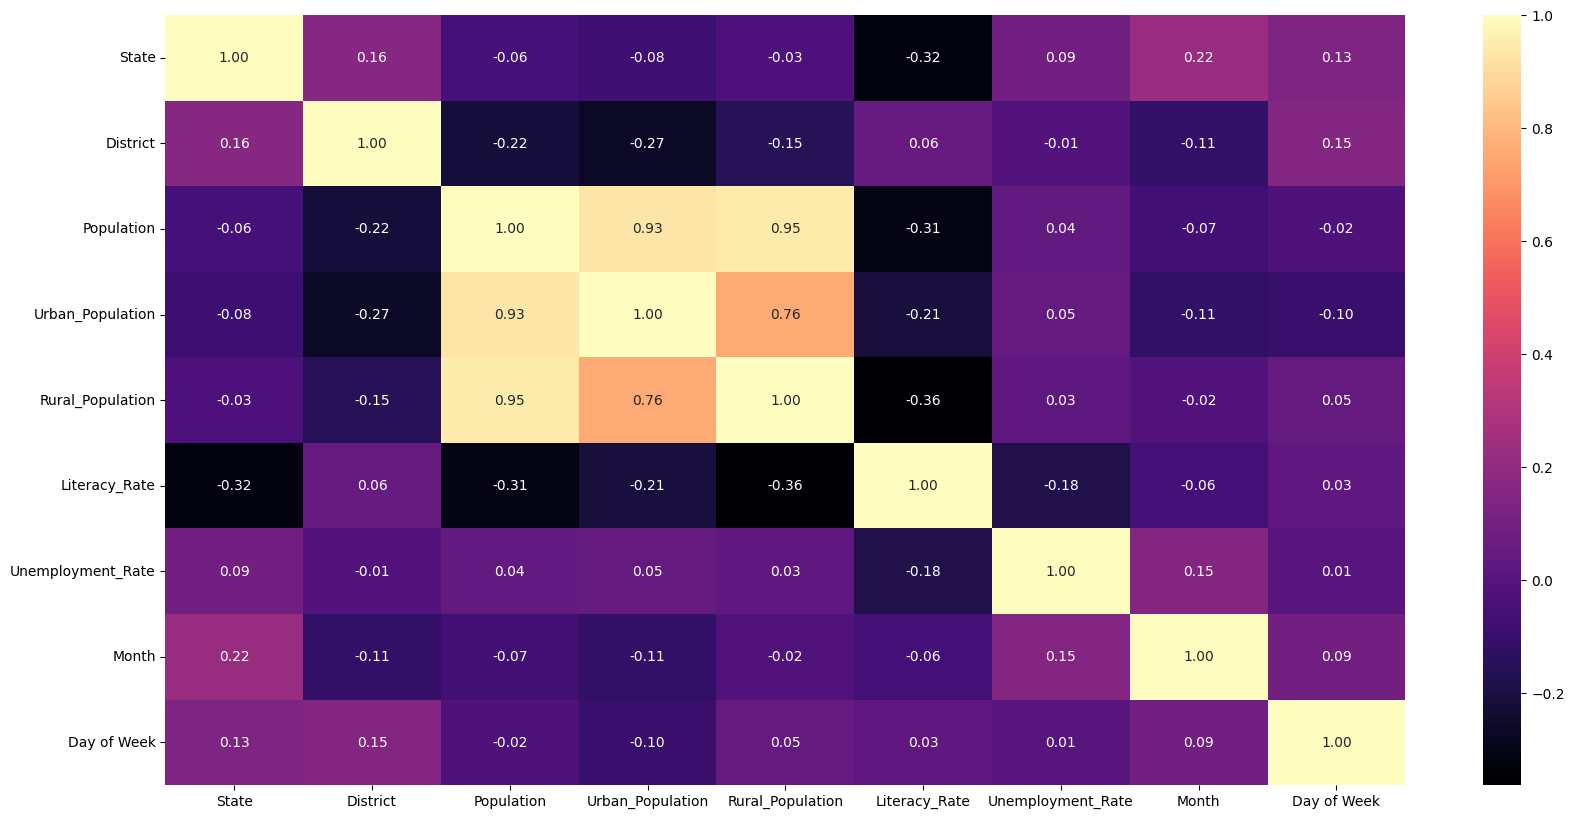

In [ ]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='magma',fmt='0.2f')

In [ ]:
df.drop(['District','Month','Day of Week'],axis=1,inplace=True)

In [ ]:
df.drop(['Unemployment_Rate'],axis=1,inplace=True)

In [ ]:
df.drop(['Urban_Population'],axis=1,inplace=True)

In [ ]:
x=df.drop('Literacy_Rate',axis=1)
y=df['Literacy_Rate']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)
model=RandomForestRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.3121556134730289

# **7.Outliers Removal**

<Axes: >

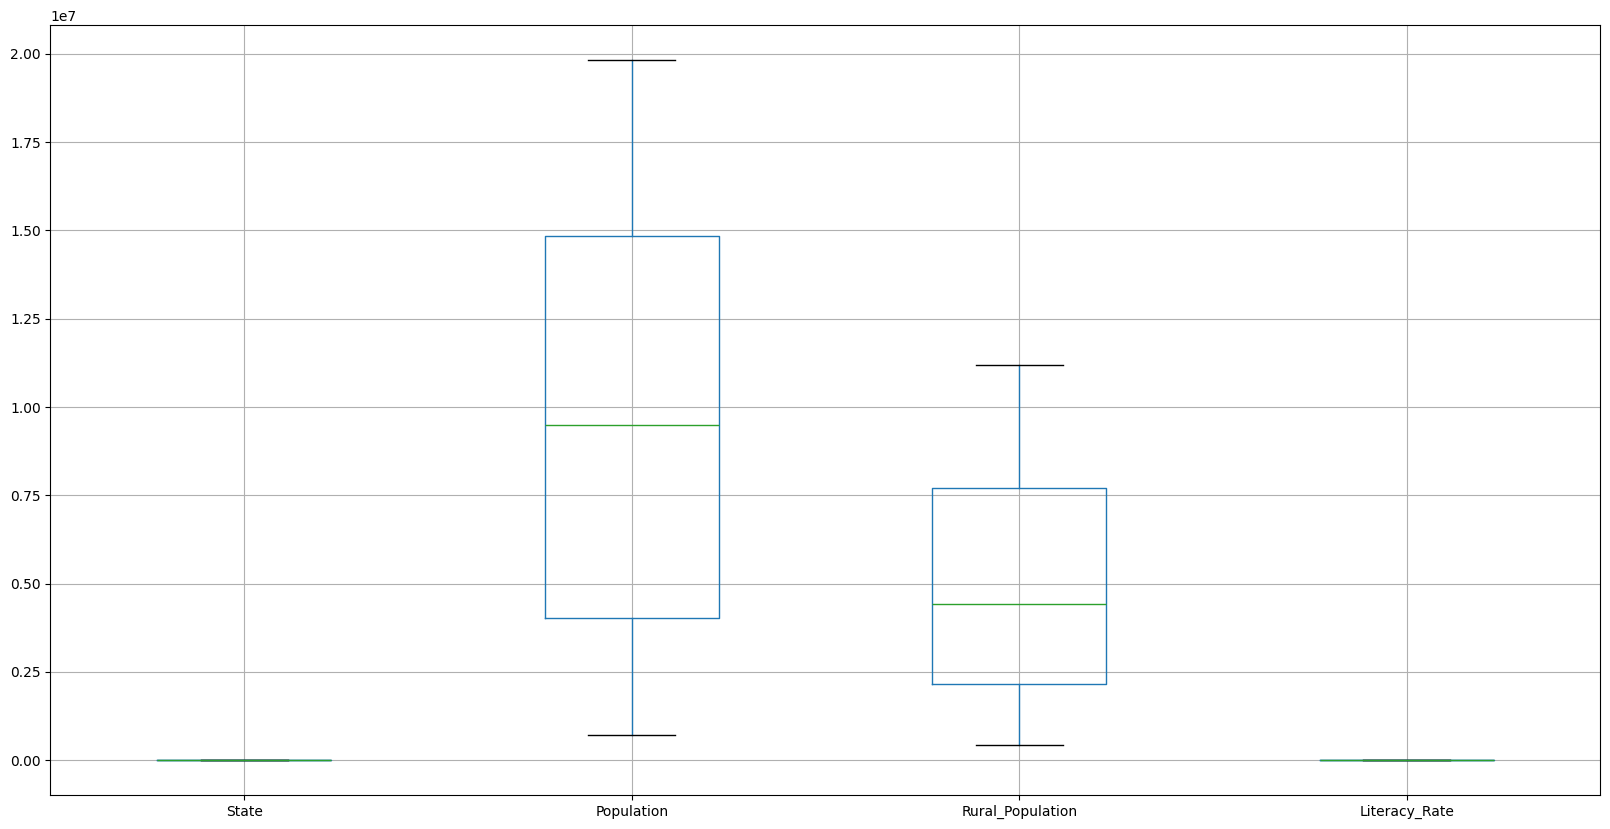

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()

**No Outliers **

# **8. Data Scaling**

In [ ]:
minmax=MinMaxScaler()
x_minmax=minmax.fit_transform(x)
xtrainm,xtestm,ytrainm,ytestm=train_test_split(x_minmax,y,random_state=42)
model_m=RandomForestRegressor()
model_m.fit(xtrainm,ytrainm)
model_m.score(xtestm,ytestm)

0.2830275325435835

In [ ]:
standard=StandardScaler()
x_stand=standard.fit_transform(x)
model=RandomForestRegressor()
xtrains,xtests,ytrains,ytests=train_test_split(x_stand,y,random_state=42)
model.fit(xtrains,ytrains)
model.score(xtests,ytests)

0.33639292268995846

# **9.Model Selection**

In [ ]:

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor()

# Track best fold data
best_accuracy = 0
best_fold = -1


# Save best fold's data
best_X_train = None
best_y_train = None
best_X_test = None
best_y_test = None
best_y_pred = None

# Loop over each fold
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    model.fit(xtrain,ytrain)

    # Predict
    y_pred = model.predict(xtest)
    r2 = r2_score(ytest, y_pred)
    print(f"Fold {fold} Accuracy: {r2}")

    # Update best fold
    if r2 > best_accuracy:
        best_accuracy = r2
        best_fold = fold
        best_X_train = xtrain
        best_y_train = ytrain
        best_X_test = xtest
        best_y_test = ytest
        best_y_pred = y_pred

# Output best fold details
print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

Fold 1 Accuracy: 0.4742482192703169
Fold 2 Accuracy: -0.16395432965634615
Fold 3 Accuracy: 0.2721846276715455
Fold 4 Accuracy: -1.3159626664827138
Fold 5 Accuracy: -1.1327409552378387

 Best Fold: 1 with Accuracy: 0.4742482192703169


In [ ]:
tree=DecisionTreeRegressor()
tree.fit(best_X_train,best_y_train)
tree.score(best_X_test,best_y_test)

0.4575587370388601

In [ ]:
forest=RandomForestRegressor()
forest.fit(best_X_train,best_y_train)
forest.score(best_X_test,best_y_test)

0.48655591194400916

In [ ]:
linear=LinearRegression()
linear.fit(best_X_train,best_y_train)
linear.score(best_X_test,best_y_test)

0.3645502688475222

In [ ]:
svr=SVR(kernel='poly',degree=8)
svr.fit(best_X_train,best_y_train)
svr.score(best_X_test,best_y_test)

0.0007107007693762935

In [ ]:
sigmoid=SVR(kernel='sigmoid')
sigmoid.fit(best_X_train,best_y_train)
sigmoid.score(best_X_test,best_y_test)

0.026548677480944805

In [ ]:
RBF=SVR(kernel='rbf')
RBF.fit(best_X_train,best_y_train)
RBF.score(best_X_test,best_y_test)

0.04184193377424539

#**Classification**

---
**Problem Statement**
---
Predicting the District using features.


## **1.Understanding the data**

In [ ]:
data=pd.read_csv('/content/indian_population_data.csv')
data

,State,District,Date,Population,Urban_Population,Rural_Population,Literacy_Rate,Unemployment_Rate
0,Karnataka,District_1,2021-01-01,2958142,1149583.0,1808559,84.33,6.91
1,Maharashtra,District_3,2021-08-21,13351510,8538746.0,4812764,70.90,10.35
2,Tamil Nadu,District_5,2021-05-13,9030773,5093525.0,3937248,73.78,9.64
3,Maharashtra,District_3,2021-05-27,9573577,4882444.0,4691133,91.87,7.44
4,Tamil Nadu,District_1,2021-12-01,19201074,8580644.0,10620430,62.64,7.07
5,Gujarat,District_1,2021-06-09,9895417,6837305.0,3058112,85.90,6.30
6,Tamil Nadu,District_2,2021-10-31,1007141,564828.0,442313,86.76,NaN
7,Karnataka,District_4,2021-03-15,2179025,1455130.0,723895,80.32,2.92
8,Karnataka,District_3,2021-03-05,18456778,7604638.0,10852140,60.24,4.56
9,West Bengal,District_5,2021-02-26,2923304,1958101.0,965203,75.30,2.61


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              50 non-null     object 
 1   District           50 non-null     object 
 2   Date               50 non-null     object 
 3   Population         50 non-null     int64  
 4   Urban_Population   49 non-null     float64
 5   Rural_Population   50 non-null     int64  
 6   Literacy_Rate      49 non-null     float64
 7   Unemployment_Rate  46 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ KB


In [ ]:
data.shape

(50, 8)

## **2.Data Cleaning**

In [ ]:
data.isnull().sum()

,0
State,0
District,0
Date,0
Population,0
Urban_Population,1
Rural_Population,0
Literacy_Rate,1
Unemployment_Rate,4


In [ ]:
data['Urban_Population'].fillna(data['Urban_Population'].mean(),inplace=True)

<ipython-input-159-e8250e6a4b4e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Urban_Population'].fillna(data['Urban_Population'].mean(),inplace=True)


In [ ]:

data['Literacy_Rate'].fillna(data['Literacy_Rate'].median(),inplace=True)

<ipython-input-160-dee99dca2f5d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Literacy_Rate'].fillna(data['Literacy_Rate'].median(),inplace=True)


In [ ]:
data['Unemployment_Rate'].fillna(data['Unemployment_Rate'].median(),inplace=True)

<ipython-input-161-c83fce644fdb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Unemployment_Rate'].fillna(data['Unemployment_Rate'].median(),inplace=True)


In [ ]:
data.isnull().sum()

,0
State,0
District,0
Date,0
Population,0
Urban_Population,0
Rural_Population,0
Literacy_Rate,0
Unemployment_Rate,0


In [ ]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [State, District, Date, Population, Urban_Population, Rural_Population, Literacy_Rate, Unemployment_Rate]
Index: []


*No Duplicate values*

## **3. Descriptive Statistics**

In [ ]:
data.describe()

,Population,Urban_Population,Rural_Population,Literacy_Rate,Unemployment_Rate
count,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,50.000000
mean,9.800240e+06,4.861328e+06,4.928390e+06,77.92640,7.361400
std,5.951987e+06,2.981295e+06,3.360039e+06,9.95029,2.415118
min,6.977730e+05,2.690050e+05,4.287680e+05,60.24000,1.780000
25%,4.032124e+06,2.287364e+06,2.146844e+06,70.06000,5.835000
50%,9.477754e+06,4.835003e+06,4.419210e+06,78.66000,7.615000
75%,1.485667e+07,7.822593e+06,7.702816e+06,86.20000,9.197500
max,1.982286e+07,1.086285e+07,1.120322e+07,94.40000,11.390000


## **4. Data Visualization**

## **5. Feature Engineering**

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Day of Week']=data['Date'].dt.dayofweek

data.drop('Date',axis=1,inplace=True)

## **6. Correlation Analysis**

In [ ]:
encode=LabelEncoder()
data['State']=encode.fit_transform(data['State'])

data['District']=encode.fit_transform(data['District'])

In [ ]:
data.drop('Year',axis=1,inplace=True)

In [ ]:
corr=data.corr()

<Axes: >

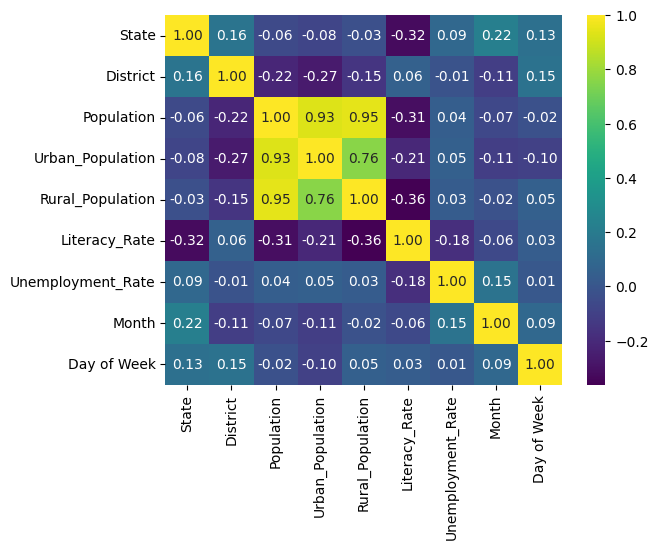

In [ ]:
sns.heatmap(corr,fmt='0.2f',annot=True,cmap='viridis')

In [ ]:
data.drop(['Literacy_Rate','Unemployment_Rate','Month'],axis=1,inplace=True)

In [ ]:
data.drop(['Day of Week','Population'],axis=1,inplace=True)

In [ ]:
x=data.drop('District',axis=1)
y=data['District']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=13)
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.3076923076923077

## **7. Removing Outliers**

<Axes: >

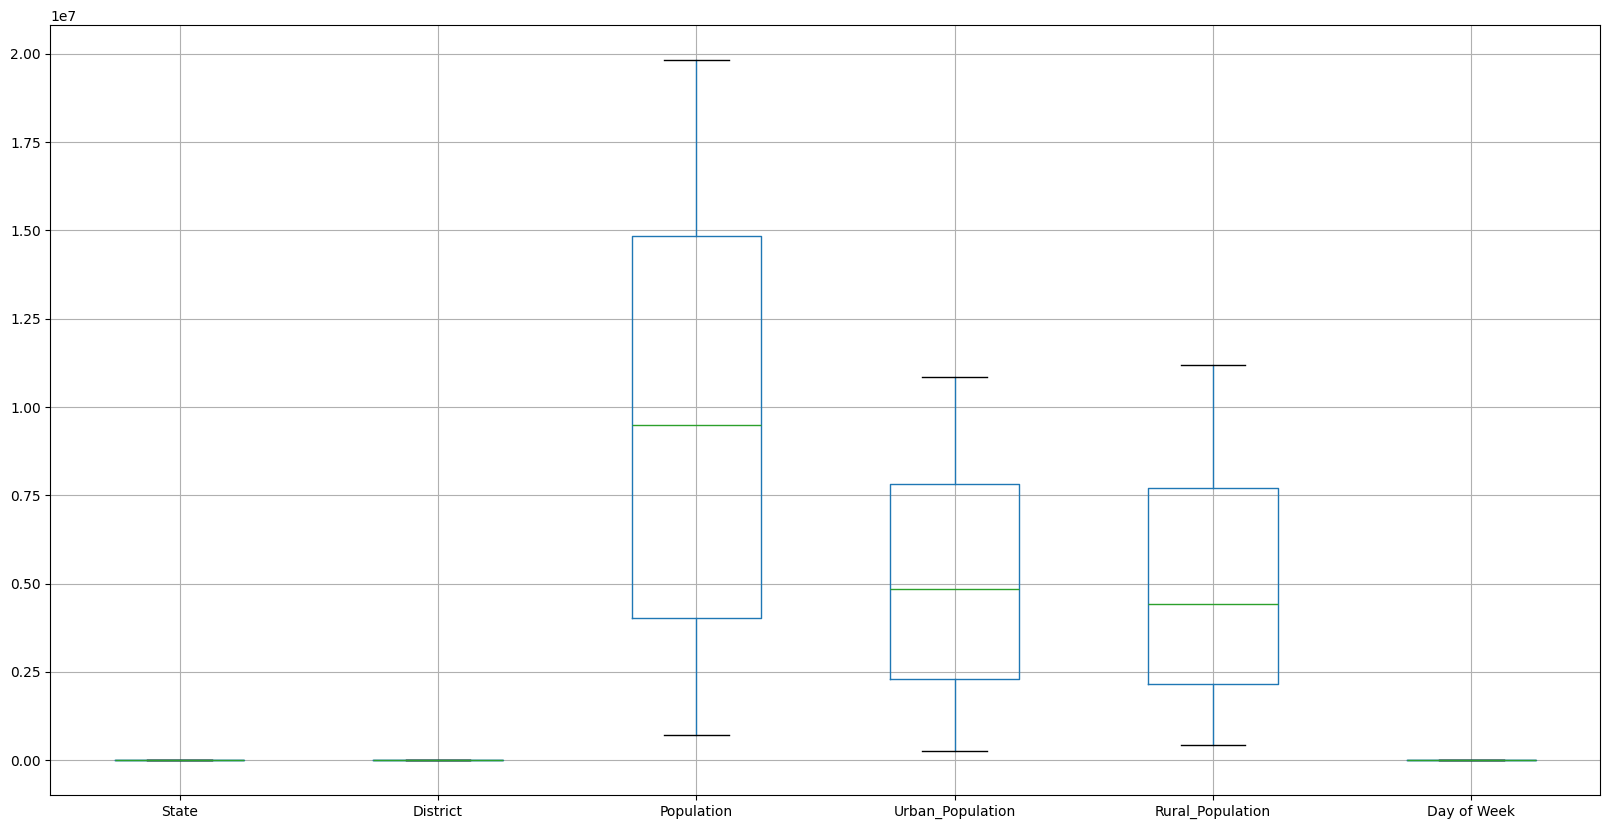

In [ ]:
plt.figure(figsize=(20,10))
data.boxplot()

## **8. Data Scaling**

In [ ]:
minmax=MinMaxScaler()
x_minmax=minmax.fit_transform(x)
xtrainm,xtestm,ytrainm,ytestm=train_test_split(x_minmax,y,random_state=13)
model_m=DecisionTreeClassifier()
model_m.fit(xtrainm,ytrainm)
model_m.score(xtestm,ytestm)

0.3076923076923077

In [ ]:
standard=StandardScaler()
x_stand=standard.fit_transform(x)
model=DecisionTreeClassifier()
xtrains,xtests,ytrains,ytests=train_test_split(x_stand,y,random_state=13)
model.fit(xtrains,ytrains)
model.score(xtests,ytests)

0.23076923076923078

## **9. Model Selection**

In [ ]:

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier()

# Track best fold data
best_accuracy = 0
best_fold = -1


# Save best fold's data
best_X_train = None
best_y_train = None
best_X_test = None
best_y_test = None
best_y_pred = None

# Loop over each fold
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    model.fit(xtrain,ytrain)

    # Predict
    y_pred = model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    print(f"Fold {fold} Accuracy: {acc}")

    # Update best fold
    if acc > best_accuracy:
        best_accuracy = acc
        best_fold = fold
        best_X_train = xtrain
        best_y_train = ytrain
        best_X_test = xtest
        best_y_test = ytest
        best_y_pred = y_pred

# Output best fold details
print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

Fold 1 Accuracy: 0.3
Fold 2 Accuracy: 0.0
Fold 3 Accuracy: 0.3
Fold 4 Accuracy: 0.4
Fold 5 Accuracy: 0.1

 Best Fold: 4 with Accuracy: 0.4


In [ ]:
Tree=DecisionTreeClassifier()
Tree.fit(best_X_train,best_y_train)
Tree.score(best_X_test,best_y_test)

0.3

In [ ]:
Forest=RandomForestClassifier()
Forest.fit(best_X_train,best_y_train)
Forest.score(best_X_test,best_y_test)

0.3

In [ ]:
logistic=LogisticRegression()
logistic.fit(best_X_train,best_y_train)
logistic.score(best_X_test,best_y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1

In [ ]:
svc=SVC(kernel='sigmoid')
svc.fit(best_X_train,best_y_train)
svc.score(best_X_test,best_y_test)

0.1

In [ ]:
rbf=SVC(kernel='rbf')
rbf.fit(best_X_train,best_y_train)
rbf.score(best_X_test,best_y_test)

0.3